# Introduction:
The dataset represents the midterm examination scores of students from the "ALPHA" section in their second semester. Each row corresponds to an individual student, and the columns contain information such as serial number, section name, and scores in six different subjects: DV (Digital VLSI), M-II (Mathematics-II), PP (Programming Principles), BEEE (Basic Electrical and Electronics Engineering), FL (Formal Languages), and FIMS (Fundamentals of Information Management Systems). The dataset provides numerical marks for each subject, allowing for performance evaluation.

The "S.NO" column uniquely identifies students, while the "SECTION" column confirms that all students belong to the same section. The dataset mainly consists of integer values, representing scores obtained by students in each subject. These marks help in assessing academic performance across different domains of study. By analyzing the distribution of marks, educators can identify trends in student learning outcomes.

A primary use of this dataset would be to compare student performance across various subjects, identifying areas where students excel or struggle. For instance, some subjects may show consistently high scores, indicating better understanding, while others may have lower averages, signaling the need for improved teaching strategies. Analyzing subject-wise performance could also help in modifying the curriculum or providing targeted interventions for weaker students.

Additionally, this dataset could be utilized for ranking students based on their overall scores or individual subject scores. It can also help determine the highest and lowest marks achieved in each subject. Trends in performance could indicate whether a subject is particularly challenging for students or if certain students require additional academic support.

This data can also be useful for predicting future performance in final exams by analyzing correlations between midterm scores and overall academic success. By identifying at-risk students early, faculty members can provide necessary remedial support, improving overall class performance. Moreover, statistical techniques such as mean, median, and standard deviation can be applied to understand score distributions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
from scipy.stats import ttest_ind
df = pd.read_csv("MIDMARKS.csv")
df

Matplotlib is building the font cache; this may take a moment.


,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19,8,8,19,17,18
714,NaN,ZETA,12,1,7,10,20,8
715,NaN,ZETA,17,6,14,14,17,18
716,NaN,ZETA,12,1,6,7,15,12


In [2]:
df.info

<bound method DataFrame.info of      S.NO SECTION  DV M-II  PP BEEE  FL FIMS
0     1.0   ALPHA  12    0  17    9  19   15
1     2.0   ALPHA  19   12  16   16  18    3
2     3.0   ALPHA  18   14  18   18  18   16
3     4.0   ALPHA  15    9  19   17  19   15
4     5.0   ALPHA  18   17  19   19  20   18
..    ...     ...  ..  ...  ..  ...  ..  ...
713   NaN    ZETA  19    8   8   19  17   18
714   NaN    ZETA  12    1   7   10  20    8
715   NaN    ZETA  17    6  14   14  17   18
716   NaN    ZETA  12    1   6    7  15   12
717   NaN    ZETA  19   14  17   16  20   19

[718 rows x 8 columns]>

In [3]:
df.size

5744

In [4]:
df['SECTION'] = df['SECTION'].fillna('SIGMA') 
df['SECTION'] = df['SECTION'].replace('','SIGMA')
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19,8,8,19,17,18
714,NaN,ZETA,12,1,7,10,20,8
715,NaN,ZETA,17,6,14,14,17,18
716,NaN,ZETA,12,1,6,7,15,12


In [5]:
df['S.NO'] = range(1, len(df) +1)
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1,ALPHA,12,0,17,9,19,15
1,2,ALPHA,19,12,16,16,18,3
2,3,ALPHA,18,14,18,18,18,16
3,4,ALPHA,15,9,19,17,19,15
4,5,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,714,ZETA,19,8,8,19,17,18
714,715,ZETA,12,1,7,10,20,8
715,716,ZETA,17,6,14,14,17,18
716,717,ZETA,12,1,6,7,15,12


In [6]:
df['FL'] = df['FL'].fillna(0) 
df=df.dropna()

In [7]:
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1,ALPHA,12,0,17,9,19,15
1,2,ALPHA,19,12,16,16,18,3
2,3,ALPHA,18,14,18,18,18,16
3,4,ALPHA,15,9,19,17,19,15
4,5,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,714,ZETA,19,8,8,19,17,18
714,715,ZETA,12,1,7,10,20,8
715,716,ZETA,17,6,14,14,17,18
716,717,ZETA,12,1,6,7,15,12


In [8]:
df.isnull()

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
713,False,False,False,False,False,False,False,False
714,False,False,False,False,False,False,False,False
715,False,False,False,False,False,False,False,False
716,False,False,False,False,False,False,False,False


In [9]:
df.fillna(0)

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1,ALPHA,12,0,17,9,19,15
1,2,ALPHA,19,12,16,16,18,3
2,3,ALPHA,18,14,18,18,18,16
3,4,ALPHA,15,9,19,17,19,15
4,5,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,714,ZETA,19,8,8,19,17,18
714,715,ZETA,12,1,7,10,20,8
715,716,ZETA,17,6,14,14,17,18
716,717,ZETA,12,1,6,7,15,12


In [10]:
df.rename(columns={'M-II':'M2'},inplace=True) 

<ipython-input-10-d5a9f5017585>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'M-II':'M2'},inplace=True)


In [11]:
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS
0,1,ALPHA,12,0,17,9,19,15
1,2,ALPHA,19,12,16,16,18,3
2,3,ALPHA,18,14,18,18,18,16
3,4,ALPHA,15,9,19,17,19,15
4,5,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,714,ZETA,19,8,8,19,17,18
714,715,ZETA,12,1,7,10,20,8
715,716,ZETA,17,6,14,14,17,18
716,717,ZETA,12,1,6,7,15,12


In [12]:
df['DV'] = pd.to_numeric(df['DV'], errors='coerce')
df['M2'] = pd.to_numeric(df['M2'], errors='coerce')
df['PP'] = pd.to_numeric(df['PP'], errors='coerce')
df['BEEE'] = pd.to_numeric(df['BEEE'], errors='coerce')
df['FL'] = pd.to_numeric(df['FL'], errors='coerce')
df['FIMS'] = pd.to_numeric(df['FIMS'], errors='coerce')
df.fillna(0, inplace=True)

<ipython-input-12-37f9fda7f79b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DV'] = pd.to_numeric(df['DV'], errors='coerce')
<ipython-input-12-37f9fda7f79b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['M2'] = pd.to_numeric(df['M2'], errors='coerce')
<ipython-input-12-37f9fda7f79b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [13]:
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0
...,...,...,...,...,...,...,...,...
713,714,ZETA,19.0,8.0,8.0,19.0,17.0,18.0
714,715,ZETA,12.0,1.0,7.0,10.0,20.0,8.0
715,716,ZETA,17.0,6.0,14.0,14.0,17.0,18.0
716,717,ZETA,12.0,1.0,6.0,7.0,15.0,12.0


In [14]:
df['Total'] = df['DV'] + df['M2'] + df['PP'] + df['BEEE'] + df['FL'] + df['FIMS']
df

<ipython-input-14-11d5bb28c41b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['DV'] + df['M2'] + df['PP'] + df['BEEE'] + df['FL'] + df['FIMS']


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0
...,...,...,...,...,...,...,...,...,...
713,714,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0
714,715,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0
715,716,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0
716,717,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0


In [15]:
df["Percentage"] = (df['Total']/120)*100
df

<ipython-input-15-4836e2cb5547>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Percentage"] = (df['Total']/120)*100


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60.000000
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70.000000
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85.000000
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78.333333
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92.500000
...,...,...,...,...,...,...,...,...,...,...
713,714,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74.166667
714,715,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48.333333
715,716,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,71.666667
716,717,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44.166667


In [16]:
df['Percentage'] = df['Percentage'].round().astype(int)
df

<ipython-input-16-97f33416007b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Percentage'] = df['Percentage'].round().astype(int)


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92
...,...,...,...,...,...,...,...,...,...,...
713,714,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74
714,715,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48
715,716,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,72
716,717,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44


In [17]:
def assign_grade(percentage):
    if percentage >= 90:
        return 'A'
    elif percentage >= 80:
        return 'B+'
    elif percentage >= 70:
        return 'B'
    elif percentage >= 60:
        return 'C+'
    elif percentage >=50:
        return 'C'
    elif percentage >=40:
        return 'D'
    else:
        return 'F'
df['Grade'] = df['Percentage'].apply(assign_grade)
df

<ipython-input-17-90038904a30a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grade'] = df['Percentage'].apply(assign_grade)


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60,C+
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70,B
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85,B+
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78,B
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92,A
...,...,...,...,...,...,...,...,...,...,...,...
713,714,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74,B
714,715,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48,D
715,716,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,72,B
716,717,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44,D


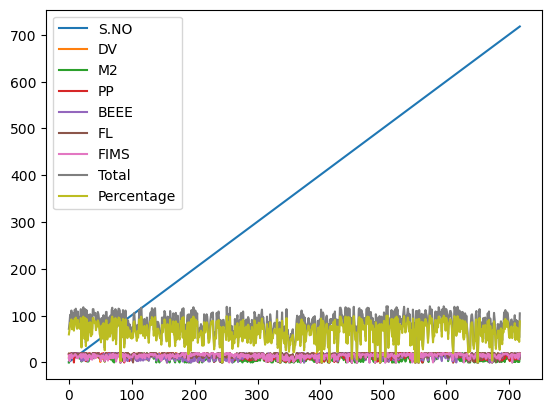

In [18]:
df.plot()
plt.show()

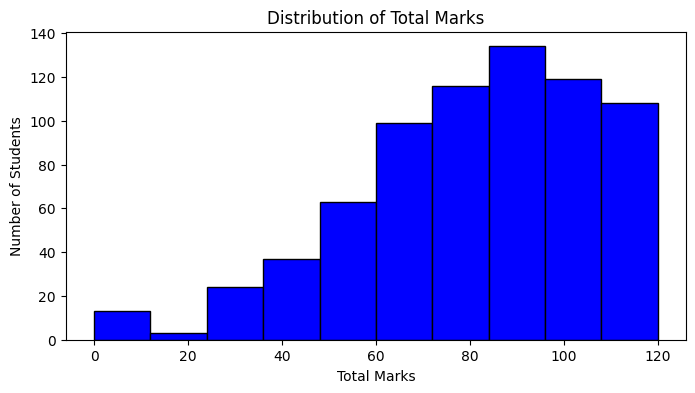

In [19]:
plt.figure(figsize=[8, 4])
plt.hist(df['Total'], color='blue', bins=10, edgecolor='black')
plt.title("Distribution of Total Marks")
plt.xlabel("Total Marks")
plt.ylabel("Number of Students")
plt.show()

<ipython-input-20-5f1d1deaaba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DV'] = pd.to_numeric(df['DV'], errors='coerce')


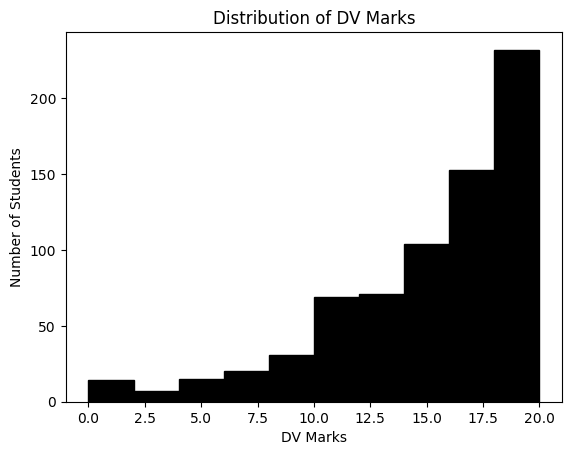

In [20]:
df['DV'] = pd.to_numeric(df['DV'], errors='coerce')
df = df.dropna(subset=['DV'])
plt.hist(df['DV'], bins=10, color='black', edgecolor='black')
plt.title("Distribution of DV Marks")
plt.xlabel("DV Marks")
plt.ylabel("Number of Students")
plt.show()

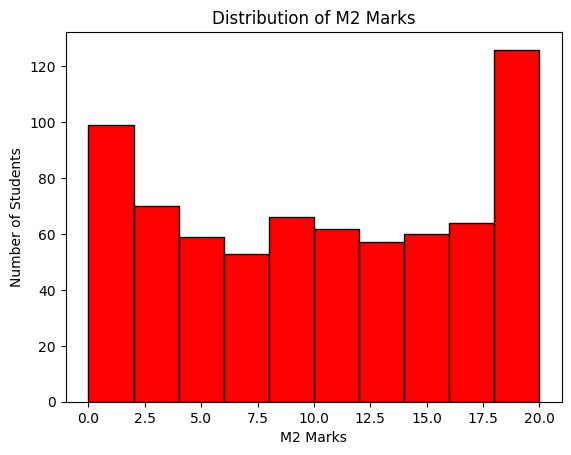

In [21]:
df['M2'] = pd.to_numeric(df['M2'], errors='coerce')
df = df.dropna(subset=['M2'])
plt.hist(df['M2'], bins=10, color='red', edgecolor='black')
plt.title("Distribution of M2 Marks")
plt.xlabel("M2 Marks")
plt.ylabel("Number of Students")
plt.show()

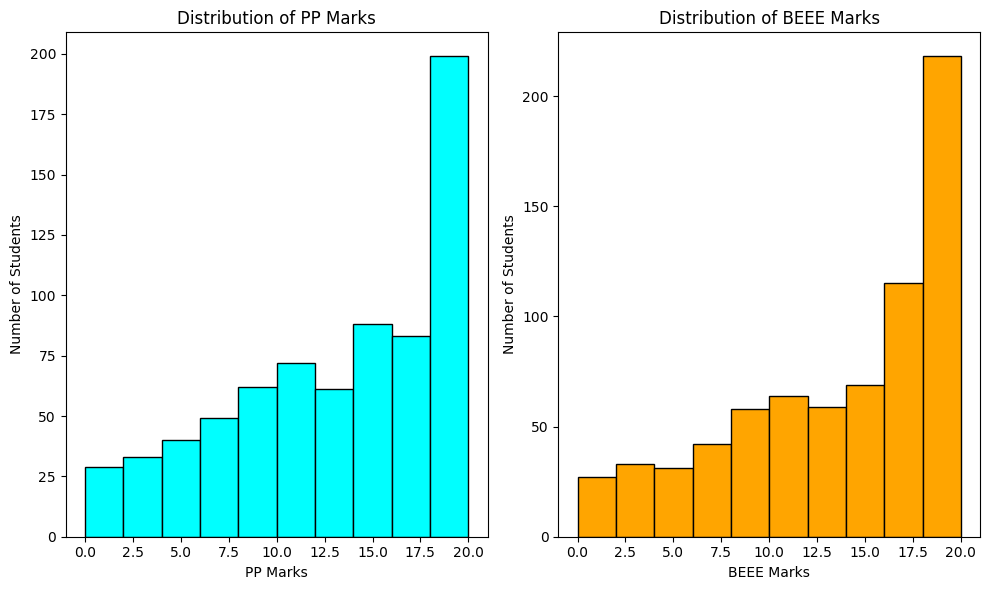

In [22]:
df['PP'] = pd.to_numeric(df['PP'], errors='coerce')
df['BEEE'] = pd.to_numeric(df['BEEE'], errors='coerce')
df_clean = df.dropna(subset=['PP', 'BEEE'])

plt.figure(figsize=[10, 6])

plt.subplot(1, 2, 1)
plt.hist(df_clean['PP'], bins=10, color='cyan', edgecolor='black')
plt.title("Distribution of PP Marks")
plt.xlabel("PP Marks")
plt.ylabel("Number of Students")

plt.subplot(1, 2, 2)
plt.hist(df_clean['BEEE'], bins=10, color='orange', edgecolor='black')
plt.title("Distribution of BEEE Marks")
plt.xlabel("BEEE Marks")
plt.ylabel("Number of Students")

plt.tight_layout()
plt.show()

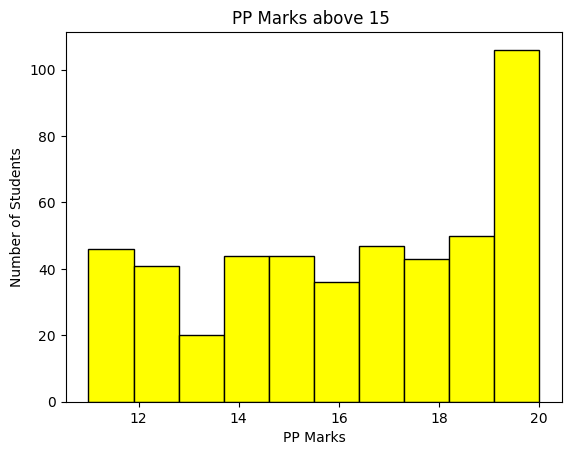

In [23]:
filtered_df = df[df['PP'] > 10]
plt.hist(filtered_df['PP'], bins=10, color='yellow', edgecolor='black')
plt.title("PP Marks above 15 ")
plt.xlabel("PP Marks")
plt.ylabel("Number of Students")
plt.show()

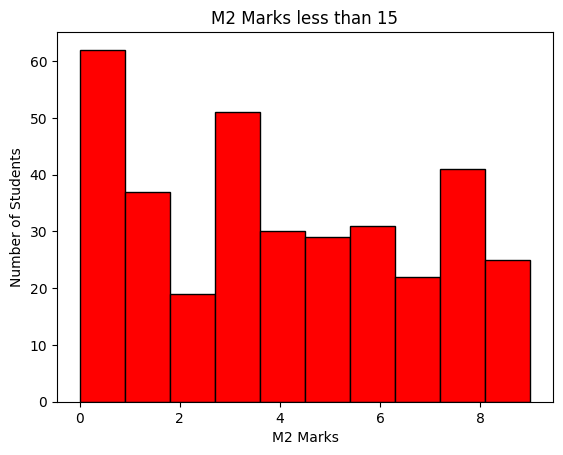

In [24]:
filtered_df = df[df['M2'] < 10]

plt.hist(filtered_df['M2'], bins=10, color='red', edgecolor='black')
plt.title("M2 Marks less than 15")
plt.xlabel("M2 Marks")
plt.ylabel("Number of Students")
plt.show()

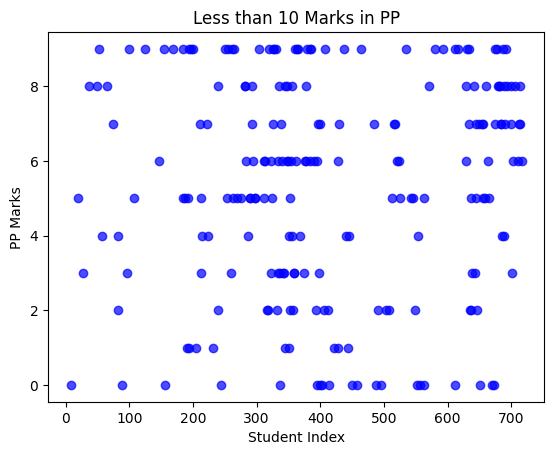

In [25]:
filtered_df = df[df['PP'] < 10]

plt.scatter(filtered_df.index, filtered_df['PP'], alpha=0.7, color='blue')
plt.title("Less than 10 Marks in PP")
plt.xlabel("Student Index")
plt.ylabel("PP Marks")
plt.show()

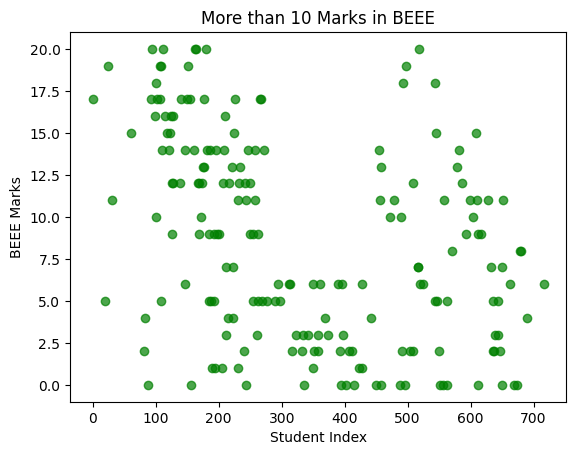

In [26]:
filtered_df = df[df['BEEE'] < 10]

plt.scatter(filtered_df.index, filtered_df['PP'], alpha=0.7, color='green')
plt.title("More than 10 Marks in BEEE")
plt.xlabel("Student Index")
plt.ylabel("BEEE Marks")
plt.show()

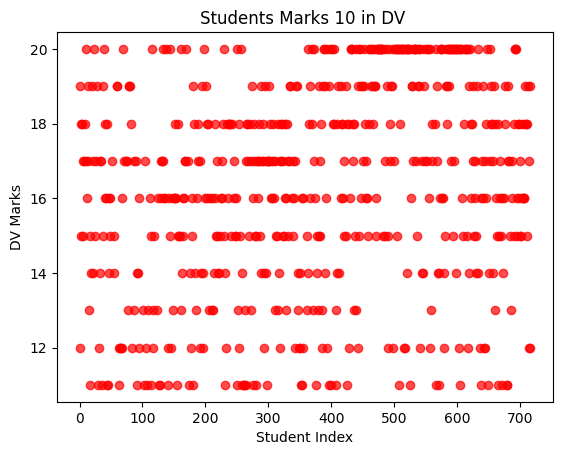

In [27]:
filtered_df = df[df['DV'] > 10]
plt.scatter(filtered_df.index, filtered_df['DV'], alpha=0.7, color='red')
plt.title("Students Marks 10 in DV ")
plt.xlabel("Student Index")
plt.ylabel("DV Marks")
plt.show()

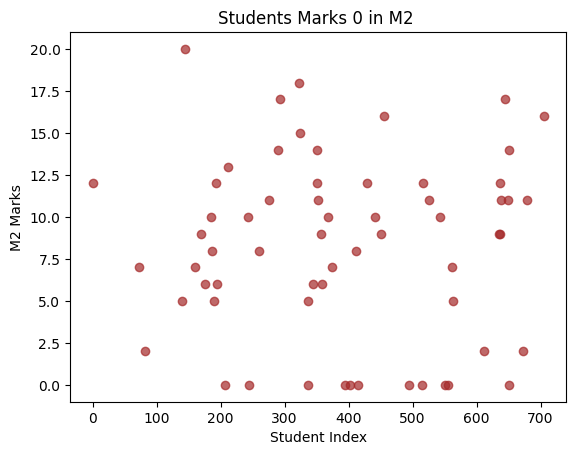

In [28]:
filtered_df = df[df['M2'] == 0]
plt.scatter(filtered_df.index, filtered_df['DV'], alpha=0.7, color='brown')
plt.title("Students Marks 0 in M2 ")
plt.xlabel("Student Index")
plt.ylabel("M2 Marks")
plt.show()

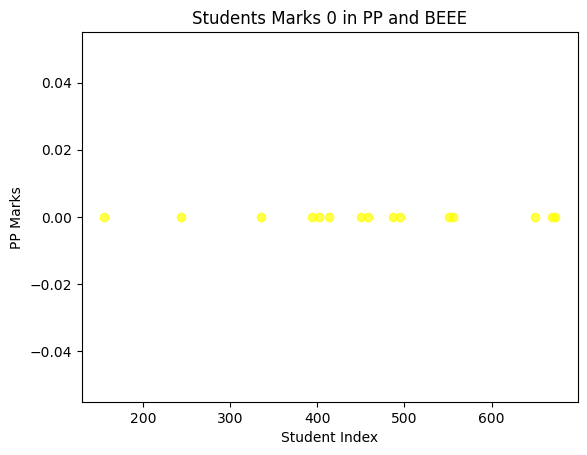

In [29]:
filtered_df = df[(df['PP'] == 0) & (df['BEEE'] == 0)]
plt.scatter(filtered_df.index, filtered_df['PP'], alpha=0.7, color='yellow')
plt.title("Students Marks 0 in PP and BEEE")
plt.xlabel("Student Index")
plt.ylabel("PP Marks")
plt.show()

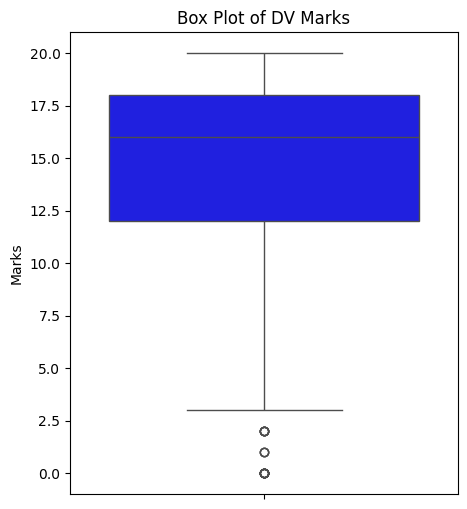

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
sns.boxplot(data=df['DV'], color='blue')
plt.title("Box Plot of DV Marks")
plt.ylabel("Marks")
plt.show()

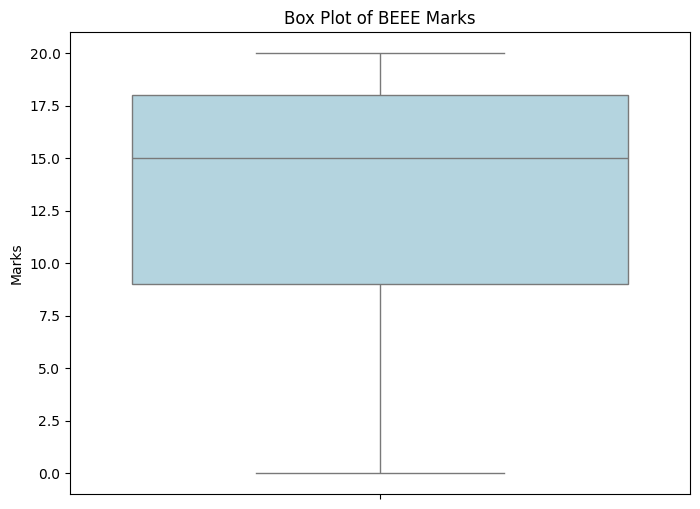

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['BEEE'], color='lightblue')
plt.title("Box Plot of BEEE Marks")
plt.ylabel("Marks")
plt.show()

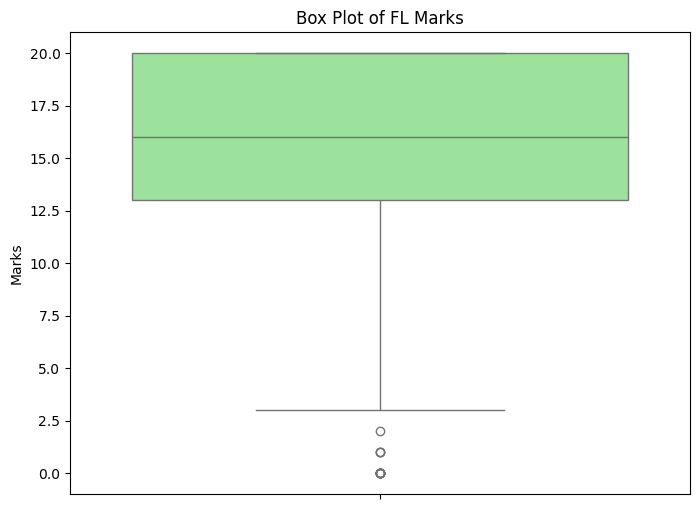

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['FL'], color='lightgreen')
plt.title("Box Plot of FL Marks")
plt.ylabel("Marks")
plt.show()

In [33]:
a=df.loc[(df['Total'] >= 75) & (df['Total'] <= 80)]
a=a.reset_index()
a

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,31,32,ALPHA,12.0,2.0,17.0,11.0,18.0,15.0,75.0,62,C+
1,33,34,ALPHA,14.0,10.0,17.0,12.0,13.0,12.0,78.0,65,C+
2,56,57,ALPHA,10.0,17.0,12.0,17.0,10.0,9.0,75.0,62,C+
3,67,68,ALPHA,12.0,6.0,13.0,20.0,15.0,9.0,75.0,62,C+
4,101,102,BETA,13.0,12.0,18.0,4.0,18.0,11.0,76.0,63,C+
5,106,107,BETA,9.0,13.0,17.0,6.0,18.0,15.0,78.0,65,C+
6,109,110,BETA,13.0,12.0,19.0,4.0,18.0,14.0,80.0,67,C+
7,114,115,BETA,11.0,14.0,16.0,4.0,18.0,12.0,75.0,62,C+
8,126,127,BETA,11.0,14.0,12.0,7.0,15.0,17.0,76.0,63,C+
9,143,144,BETA,15.0,5.0,16.0,19.0,10.0,15.0,80.0,67,C+


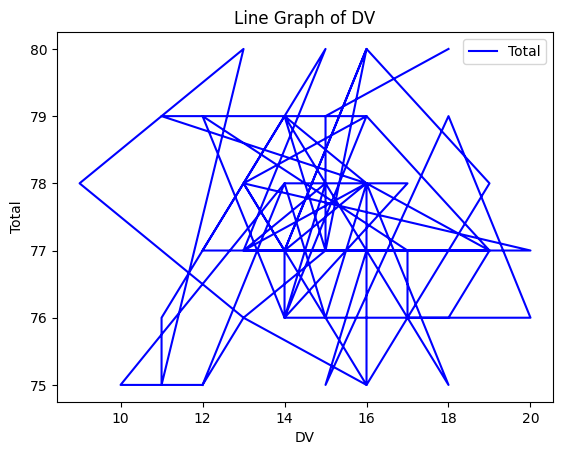

In [34]:
a.plot.line(x='DV',y='Total',color='blue')
plt.title("Line Graph of DV")
plt.ylabel("Total")
plt.show()

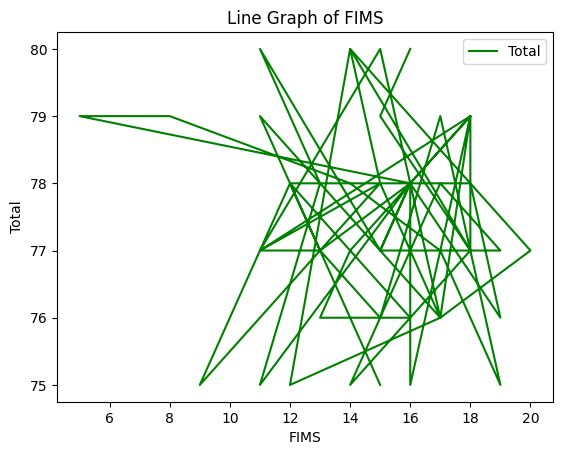

In [35]:
a.plot.line(x='FIMS',y='Total',color='green')
plt.title("Line Graph of FIMS")
plt.ylabel("Total")
plt.show()

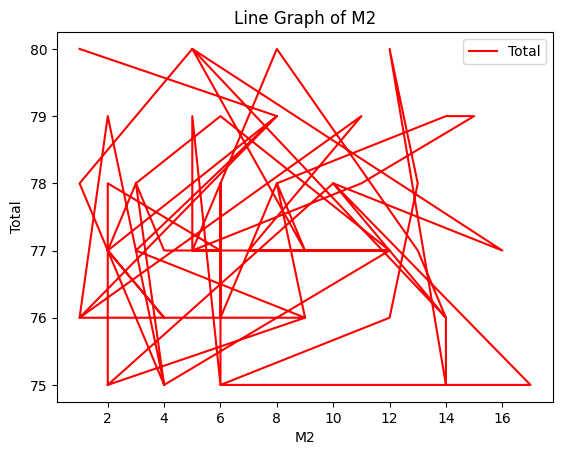

In [36]:
a.plot.line(x='M2',y='Total',color='red')
plt.title("Line Graph of M2")
plt.ylabel("Total")
plt.show()

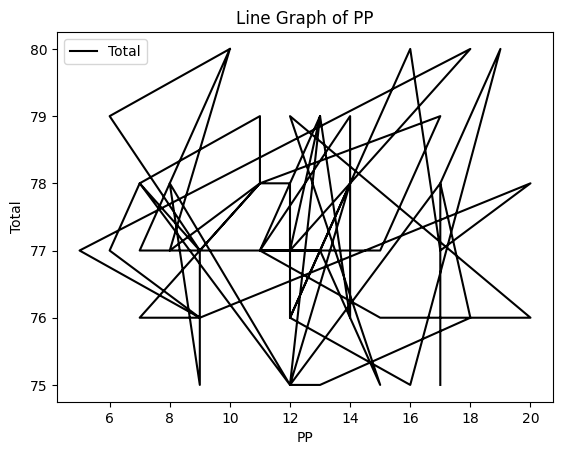

In [37]:
a.plot.line(x='PP',y='Total',color='black')
plt.title("Line Graph of PP")
plt.ylabel("Total")
plt.show()

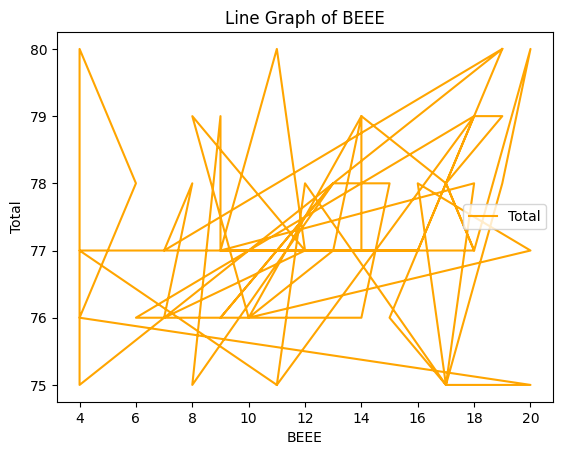

In [38]:
a.plot.line(x='BEEE',y='Total',color='orange')
plt.title("Line Graph of BEEE")
plt.ylabel("Total")
plt.show()

In [39]:
b=df.loc[(df['Total'] >= 115) & (df['Total'] <= 120)]
b=b.reset_index()
b

,index,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
0,11,12,ALPHA,20.0,20.0,20.0,20.0,19.0,16.0,115.0,96,A
1,23,24,ALPHA,20.0,20.0,20.0,20.0,20.0,18.0,118.0,98,A
2,69,70,ALPHA,20.0,20.0,20.0,19.0,20.0,18.0,117.0,98,A
3,79,80,ALPHA,19.0,20.0,20.0,19.0,20.0,17.0,115.0,96,A
4,115,116,BETA,20.0,20.0,20.0,20.0,20.0,17.0,117.0,98,A
5,132,133,BETA,20.0,18.0,20.0,20.0,20.0,18.0,116.0,97,A
6,137,138,BETA,20.0,20.0,20.0,20.0,18.0,18.0,116.0,97,A
7,182,183,DELTA,18.0,19.0,19.0,20.0,20.0,20.0,116.0,97,A
8,198,199,DELTA,20.0,20.0,20.0,20.0,20.0,18.0,118.0,98,A
9,251,252,DELTA,20.0,20.0,20.0,19.0,20.0,20.0,119.0,99,A


Text(0.5, 1.0, 'Pie Chart of DV')

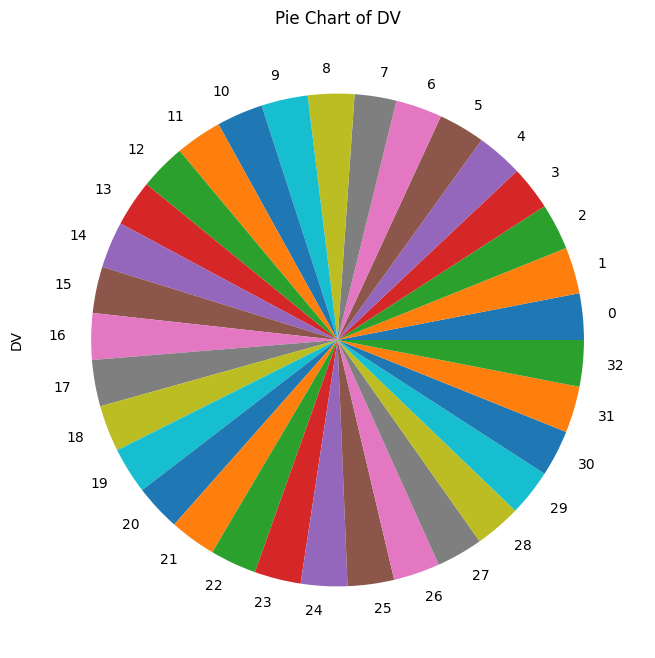

In [40]:
b['DV'].plot(kind='pie',subplots=True,figsize=(8,8))
plt.title("Pie Chart of DV")

Text(0.5, 1.0, 'Pie Chart of BEEE')

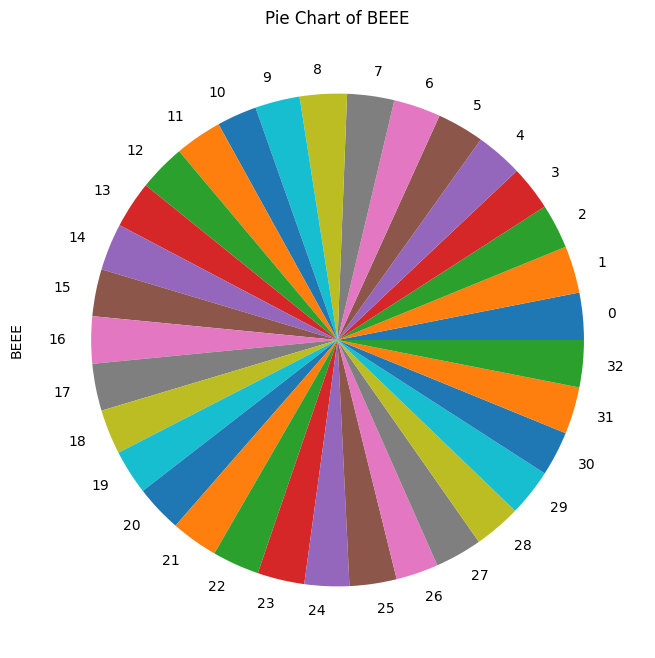

In [41]:
b['BEEE'].plot(kind='pie',subplots=True,figsize=(8,8))
plt.title("Pie Chart of BEEE")

In [42]:
df.sort_values('Total').tail(10)

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
198,199,DELTA,20.0,20.0,20.0,20.0,20.0,18.0,118.0,98,A
533,534,OMEGA,20.0,19.0,20.0,20.0,20.0,20.0,119.0,99,A
618,619,SIGMA,20.0,20.0,20.0,20.0,20.0,19.0,119.0,99,A
613,614,SIGMA,20.0,20.0,19.0,20.0,20.0,20.0,119.0,99,A
453,454,OMEGA,20.0,20.0,20.0,20.0,20.0,19.0,119.0,99,A
251,252,DELTA,20.0,20.0,20.0,19.0,20.0,20.0,119.0,99,A
505,506,OMEGA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100,A
574,575,SIGMA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100,A
596,597,SIGMA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100,A
507,508,OMEGA,20.0,20.0,20.0,20.0,20.0,20.0,120.0,100,A


In [43]:
df.sort_values('DV').tail(20)

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
521,522,OMEGA,20.0,19.0,20.0,19.0,20.0,20.0,118.0,98,A
522,523,OMEGA,20.0,14.0,19.0,19.0,20.0,18.0,110.0,92,A
523,524,OMEGA,20.0,18.0,20.0,19.0,20.0,16.0,113.0,94,A
389,390,GAMMA,20.0,15.0,14.0,16.0,20.0,12.0,97.0,81,B+
526,527,OMEGA,20.0,6.0,20.0,18.0,17.0,18.0,99.0,82,B+
388,389,GAMMA,20.0,4.0,16.0,18.0,19.0,14.0,91.0,76,B
633,634,ZETA,20.0,6.0,7.0,9.0,16.0,19.0,77.0,64,C+
531,532,OMEGA,20.0,6.0,14.0,19.0,20.0,15.0,94.0,78,B
532,533,OMEGA,20.0,12.0,20.0,19.0,20.0,17.0,108.0,90,A
533,534,OMEGA,20.0,19.0,20.0,20.0,20.0,20.0,119.0,99,A


In [44]:
df.sort_values('DV').head(50)

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade
495,496,OMEGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
244,245,DELTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
514,515,OMEGA,0.0,0.0,12.0,16.0,20.0,18.0,66.0,55,C
336,337,EPSILON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
402,403,GAMMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
414,415,GAMMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
556,557,SIGMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
395,396,GAMMA,0.0,0.0,6.0,7.0,13.0,0.0,26.0,22,F
650,651,ZETA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F
551,552,SIGMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F


In [45]:
h = df[
    (df['DV'] < 10.0) |
    (df['PP'] < 10.0) |
    (df['M2'] < 10.0) |
    (df['BEEE'] < 10.0) |
    (df['FL'] < 10.0) |
    (df['FIMS'] < 10.0)
]
h['SECTION'].value_counts()


SECTION
ZETA       69
EPSILON    67
OMEGA      62
DELTA      58
GAMMA      57
BETA       54
ALPHA      39
SIGMA      37
Name: count, dtype: int64

In [46]:
df['backlogs'] = (df[['DV', 'M2', 'PP', 'BEEE', 'FL', 'FIMS']] < 10).sum(axis=1)
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,backlogs
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60,C+,2
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70,B,1
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85,B+,0
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78,B,1
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
713,714,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74,B,2
714,715,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48,D,3
715,716,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,72,B,1
716,717,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44,D,3


In [47]:
j=df.sort_values('backlogs')
j

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,backlogs
717,718,ZETA,19.0,14.0,17.0,16.0,20.0,19.0,105.0,88,B+,0
591,592,SIGMA,17.0,20.0,16.0,16.0,20.0,19.0,108.0,90,A,0
264,265,DELTA,17.0,15.0,12.0,16.0,15.0,18.0,93.0,78,B,0
592,593,SIGMA,20.0,18.0,19.0,14.0,19.0,16.0,106.0,88,B+,0
594,595,SIGMA,20.0,17.0,18.0,20.0,19.0,20.0,114.0,95,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
650,651,ZETA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F,6
244,245,DELTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F,6
635,636,ZETA,9.0,0.0,2.0,2.0,3.0,9.0,25.0,21,F,6
556,557,SIGMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F,6


In [48]:
j.value_counts('backlogs')

backlogs
0    273
1    172
2    121
3     69
4     43
5     23
6     15
Name: count, dtype: int64

In [49]:
df["BC"]=None
df

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Total,Percentage,Grade,backlogs,BC
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,72.0,60,C+,2,None
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,84.0,70,B,1,None
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,102.0,85,B+,0,None
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,94.0,78,B,1,None
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,111.0,92,A,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,714,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,89.0,74,B,2,None
714,715,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,58.0,48,D,3,None
715,716,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,86.0,72,B,1,None
716,717,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,53.0,44,D,3,None


In [50]:
a=df[df['SECTION']=='ALPHA']['DV']
b=df[df['SECTION']=='BETA']['DV']
ttest_ind(a,b)

TtestResult(statistic=np.float64(0.6207084248259586), pvalue=np.float64(0.5355854399866022), df=np.float64(178.0))

In [51]:
ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='BETA']['DV'])

TtestResult(statistic=np.float64(0.6207084248259586), pvalue=np.float64(0.5355854399866022), df=np.float64(178.0))

In [52]:
a.head()

0    12.0
1    19.0
2    18.0
3    15.0
4    18.0
Name: DV, dtype: float64

In [53]:
b.head()

90    17.0
91    14.0
92    11.0
93    14.0
94    12.0
Name: DV, dtype: float64

In [54]:
a.info()

<class 'pandas.core.series.Series'>
Index: 90 entries, 0 to 89
Series name: DV
Non-Null Count  Dtype  
--------------  -----  
90 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


In [55]:
b.info()

<class 'pandas.core.series.Series'>
Index: 90 entries, 90 to 179
Series name: DV
Non-Null Count  Dtype  
--------------  -----  
90 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


In [56]:
a.describe()

count    90.000000
mean     13.411111
std       4.991891
min       1.000000
25%      10.250000
50%      15.000000
75%      17.000000
max      20.000000
Name: DV, dtype: float64

In [57]:
b.describe()

count    90.000000
mean     13.000000
std       3.815992
min       5.000000
25%      10.000000
50%      13.000000
75%      16.000000
max      20.000000
Name: DV, dtype: float64

In [58]:
from scipy.stats import chi2_contingency

In [59]:
data = [df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='BETA']['DV']]
data

[0     12.0
 1     19.0
 2     18.0
 3     15.0
 4     18.0
       ... 
 85     3.0
 86    17.0
 87    13.0
 88     2.0
 89    10.0
 Name: DV, Length: 90, dtype: float64,
 90     17.0
 91     14.0
 92     11.0
 93     14.0
 94     12.0
        ... 
 175    14.0
 176     6.0
 177    12.0
 178    16.0
 179    15.0
 Name: DV, Length: 90, dtype: float64]

In [60]:
from scipy.stats import chi2_contingency
a=df[df["SECTION"] == "ALPHA"]["DV"]
b=df[df["SECTION"] == "BETA"]["DV"]
stat,p,dof,expected=chi2_contingency(a,b)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)
